# Standard Brownian Motion for Financial Mathematics
*Published: Aug 10, 2021 by Rudransh Awasthi*

## Introduction
Stock price movements follow a random pattern, influenced by daily fluctuations driven by market forces such as supply and demand, company valuations, earnings, and economic factors like inflation, liquidity, demographics, and political developments. Market participants attempt to predict stock prices using these factors, but their trading activities contribute to the randomness of price movements, as the financial and economic landscapes are constantly evolving.

## What is Brownian Motion?
The Brownian motion was first introduced by botanist Robert Brown who observed the random movement of pollen particles due to water molecules under a microscope. It was in the 1900s that the French mathematician Louis Bachelier applied the concept of Brownian motion to asset price behavior for the first time, and this led to Brownian motion becoming one of the most important fundamental of modern quantitative finance. In Bachelier’s theory, price fluctuations observed over a small time period are independent of the current price along with historical behavior of price movements. Combining his assumptions with the Central Limit Theorem, he also deduces that the random behavior of prices can be said to be represented by a normal distribution (Gaussian distribution).

This led to the development of the Random Walk Hypothesis or Random Walk Theory, as it is known today in modern finance. A random walk is a statistical phenomenon wherein stock prices move randomly.

When the time step of a random walk is made infinitesimally small, the random walk becomes a Brownian motion.

*The mathematic notation and explanations are from Steven Shreve's book Stochastic Calculus for Finance II.*

In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Symmetric Random Walk

To construct a symmetric random walk, we repeatedly toss a fair coin ($p$, the probability of H on each toss, and $q$ = 1−$p$, the probability of T on each toss, are both equal to $\frac{1}{2}$). We denote the successive outcomes of the tosses by $\omega = \omega_1\omega_2\omega_3 . . .$. In other words, ω is the infinite sequence of tosses, and $\omega_n$ is the outcome of the nth toss. Let,

$X_j =
\begin{cases}
    1                & \text{if } \omega_j = H\\
    -1               & \text{if } \omega_j = T\\
\end{cases}$

and define $M_0 = 0$,

$\begin{equation}
M_k = \sum_{j=1}^{k}X_j
\end{equation}$

In [33]:
##parameters
M = 10 # Number of simulations
t = 10 # Time

In [34]:
rng = np.random.default_rng(seed=12345)       # random generator
draws = rng.integers(0, 2, size = (M,t)).T
steps = np.where(draws == 0, 1, -1)
origin = np.zeros((1,M))
walks = np.concatenate([origin, steps]).cumsum(axis=0)

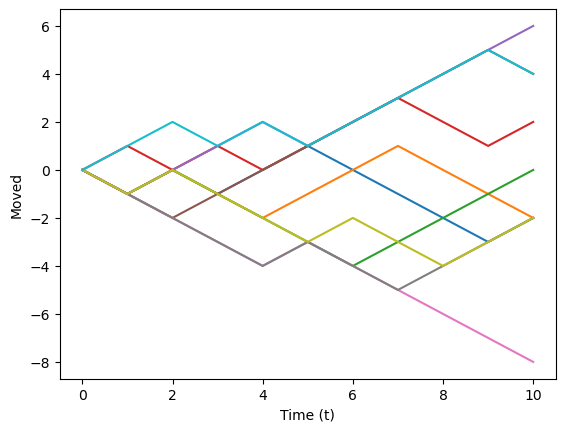

In [35]:
plt.plot(walks)
plt.xlabel("Time (t)")
plt.ylabel("Moved")
plt.show()

## Properties of a Symmetric Random Walk

1) Increments of the Symmetric Random Walk
     - A random walk has independent increments, $ 0 = k_0 < k_1 < k_2 < ... < k_m$,
       
       $ M_{k_1} = (M_{k_1} - M_{k_0}),(M_{k_2} - M_{k_1}), ... ,(M_{k_m} - M_{k_{m-1}})$ are independent.
     - $\DeclareMathOperator{\E}{\mathbb{E}}\E{(M_{k_{i+1}} - M_{k_{i}})} = 0$, each increment has expected value 0.
     - $Var(M_{k_{i+1}} - M_{k_{i}}) = k_{i+1}-k_i$, variance of the increment over any time interval $k$ to $l$ for nonnegative
       integers $k < l$ is $l − k$.
     - Variance accumulates at rate one per unit time.


2) Martingale Property for the Symmetric Random Walk
     - Conditional expectation of next value in sequence is current position    
     - $ 0 < k < l < T$  
     - $\DeclareMathOperator{\E}{\mathbb{E}}\E{[...|F_k]}$ is the conditional expectation based on information up to time k. $F_k$ is a filtration, the $\sigma$-algebra of information corresponding to first k coin tosses.
      

         $\begin{align} \DeclareMathOperator{\E}{\mathbb{E}}
                     \E{[M_l|F_k]} & = \E{[(M_l - M_k) + M_k|F_k]} \\
                     & = \E{[(M_l - M_k|F_k]} + \E{[M_k|F_k]} \\
                     & = \E{[M_l - M_k|F_k]} + M_k \\
                     & = M_k \\
                 \end{align}$

2. Quadratic variation
     - Computed Path-by-Path, one increment at a time
     - $[M,M]_k = \sum_{j=1}^k(M_j - M_{j-1})^2 = k$

In [36]:
# Variance and Quadratic Variation Functions
quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(),2)
variance = lambda x: round(np.var(x),3)

In [37]:
[quadratic_variation(walk) for walk in walks.T]

[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]

In [38]:
[variance(walk) for walk in walks[1:11]]

[0.64, 1.44, 1.96, 4.2, 3.56, 6.44, 10.44, 12.64, 15.36, 15.2]

## Scaled Symmetric Random Walk

To approximate a Brownian motion, we speed up time and scale down the step size of a symmetric random walk. More precisely, we fix a positive integer $n$ and define the *scaled symmetric random walk*

$\begin{equation}
W^{(n)}(t) = \frac{1}{\sqrt{n}}M_{nt}
\end{equation}$

In [39]:
# parameter
M = 10    # Number of simulations
t = 10    # Time
n = 100    # Scaling factor

In [40]:
rng = np.random.default_rng(seed=12345)       # random generator
draws = (1/np.sqrt(n)) * rng.integers(0, 2, size = (M,n*t)).T
steps = np.where(draws == 0, 1, -1)
origin = np.zeros((1,M))
walks = np.concatenate([origin, steps]).cumsum(axis=0)

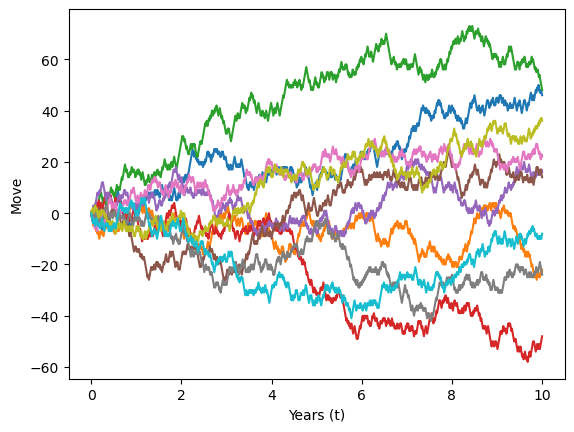

In [41]:
time = np.linspace(0, t, t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T
plt.plot(tt,walks)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [42]:
[quadratic_variation(path) for path in walks.T]

[1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0]

In [43]:
[variance(path) for path in walks[:11]]

[0.0, 0.84, 1.0, 2.76, 4.2, 4.8, 3.4, 6.4, 8.2, 11.56, 11.04]

## Limiting Distribution of Scaled Random Walk

An $n$ increases, the binomial distribution converges to normal distribution with variance t.

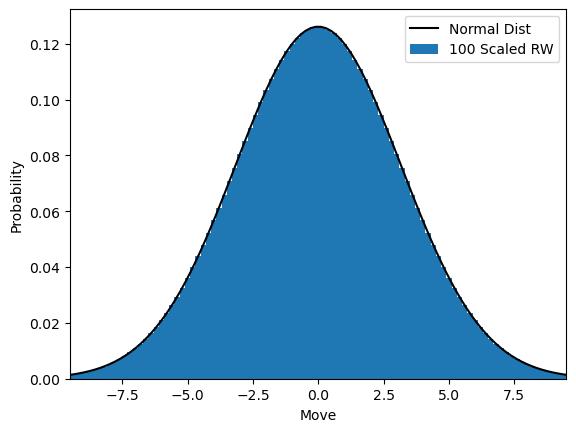

In [44]:
# Change the parameter n to see the impact of increasing the discretization
# of the random walk and how it converges on the normal distribution
n = 100
t = 10

#Combinations
def nCr(n,k):
    f = math.factorial
    return f(n) / (f(k) * f(n-k))

perms = [nCr(n*t,k)*(0.5)**(n*t) for k in range(int(n*t)+1)] 

W_nt = lambda n,t: 1/np.sqrt(n) * np.arange(-n*t,n*t+1,2)

outcomes = W_nt(n,t)
plt.bar(outcomes, [perm/(outcomes[1]-outcomes[0]) for perm in perms], outcomes[1]-outcomes[0], label='{0} Scaled RW'.format(n))
x = np.linspace(-3*np.sqrt(t), 3*np.sqrt(t), 100)
plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(t)), 'k-',label='Normal Dist')
plt.xlim(-3*np.sqrt(t),3*np.sqrt(t))
plt.ylabel("Probability")
plt.xlabel("Move")
plt.legend()
plt.show()

## Brownian Motion

We obtain Brownian motion as the limit of the scaled random walks $W^{(n)}(t)$ as $n → ∞$. The Brownian motion inherits properties from these random walks. 

$\lim_{n \to \infty} W^{(n)}(t) \sim N(0,t)$

- $W_0 = 0$
- W has independent increments
- W has Gaussian (normal) increments
- W has continuous sample paths (almost surely).

$W_t \sim N(0,t)$

- $\DeclareMathOperator{\E}{\mathbb{E}}\E{(W_{t_{i+1}} - W_{t_{i}})} = 0$
- $Var(W_{t_{i+1}} - W_{t_{i}}) = t_{i+1}-t_i$

One difference between Brownian motion $W(t)$ and a scaled random walk, say $W^{(100)}(t)$, is that the scaled random walk has a natural time step $1/100$ and is linear between these time steps, whereas the Brownian motion has no linear pieces. The other difference is that, while the scaled random walk W(100)(t) is only approximately normal for each t, the Brownian motion is exactly normal. This is a consequence of the Central Limit Theorem. Not only is $W(t) = W(t) − W(0)$ normally distributed for each t, but the increments $W(t) − W(s)$ are
normally distributed for all $0 ≤ s < t.$

In [45]:
# Parameters
M = 10    #number of simulations
t = 10    #time
n = 100    #steps
dt = t/n   # time step

In [46]:
steps = np.random.normal(0, np.sqrt(dt), size=(M,n)).T
origin = np.zeros((1,M))
bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)

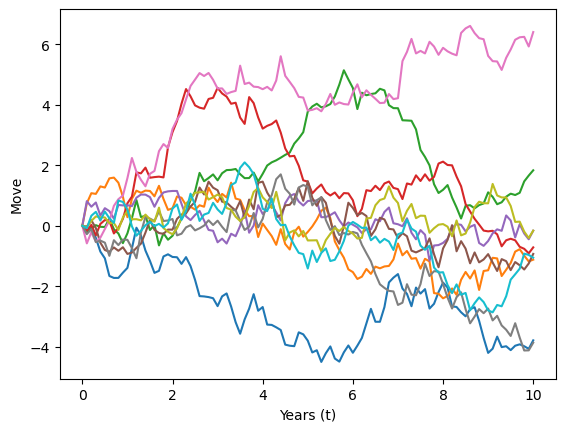

In [47]:
time = np.linspace(0,t,n+1)
tt = np.full(shape=(M, n+1), fill_value=time)
tt = tt.T

plt.plot(tt,bm_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [48]:
# change time steps to 1,000,000 to observe same quadratic variation along paths
[quadratic_variation(path) for path in bm_paths.T[:4]]

[11.58, 11.38, 8.51, 9.7]

In [49]:
# change simulations to 100,000 to observe convergence of variance to Time at a particular time step
[variance(path) for path in bm_paths[1:11]]

[0.177, 0.142, 0.279, 0.335, 0.439, 0.733, 0.68, 0.812, 0.653, 0.704]

## Thank You!